# Libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from warnings import filterwarnings
# Ignore warnings
filterwarnings('ignore')

# Loading dataset

In [2]:
#Load the NetCDF file
da = xr.open_dataset('Africa_cru_data.nc')['pre']


ghana_precip = da.sel(
    lat=slice(4.5, 11.5),  # Ghana's latitude range
    lon=slice(-3.5, 1.5),  # Ghana's longitude range
    time=slice('2011', '2020')  # 10 years
)


# Plotting

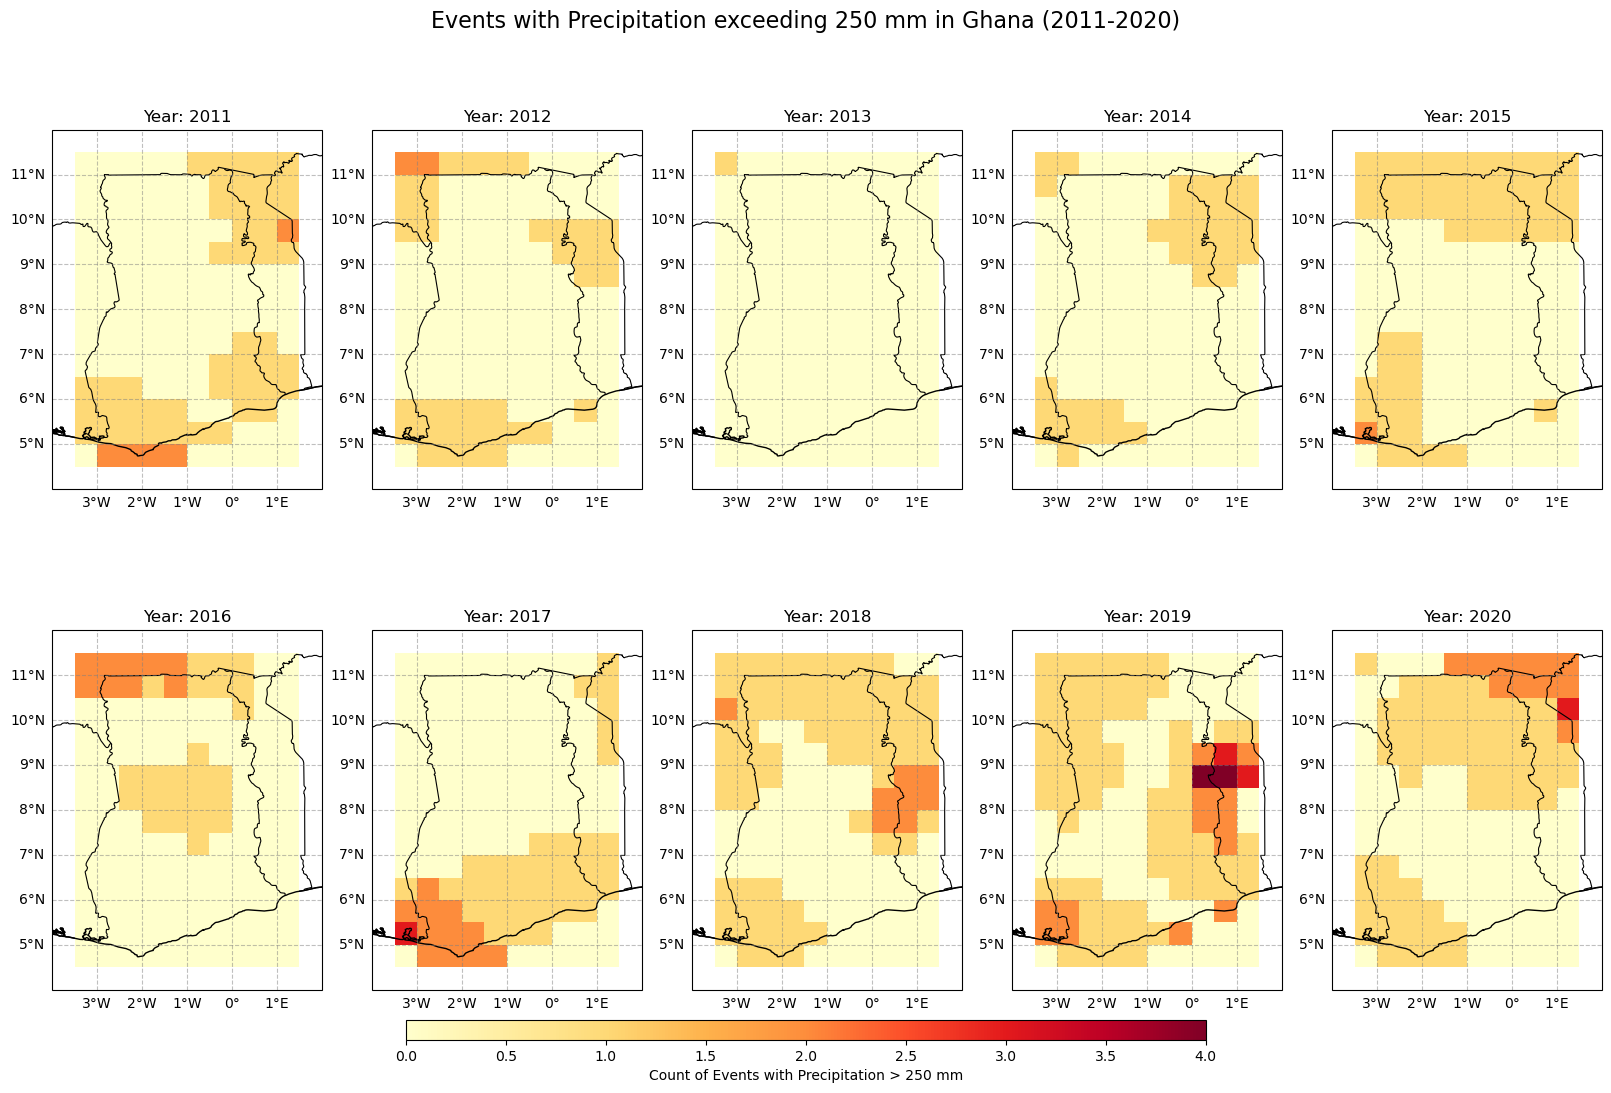

In [3]:

# Step 3: Count events where precipitation exceeds 250 mm, grouped by year
annual_exceedance_count = ghana_precip.where(ghana_precip > 250).groupby('time.year').count(dim='time')

# Step 4: Set up the map projection
projection = ccrs.PlateCarree()

# Step 5: Create a 10-subplot figure (2 rows, 5 columns)
fig, axes = plt.subplots(
    nrows=2, ncols=5, figsize=(16, 10),
    subplot_kw={'projection': projection},
    constrained_layout=True
)

# Flatten axes for easier iteration
axes = axes.flatten()

# Step 6: Plot each year's count of exceedance events
years = annual_exceedance_count.year.values
for i, year in enumerate(years):
    ax = axes[i]
    
    # Plot the count of events for the year
    plot = annual_exceedance_count.sel(year=year).plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap='YlOrRd',
        vmin=0, vmax=annual_exceedance_count.max(),
        add_colorbar=False
    )
    
    # Set title for each subplot
    ax.set_title(f'Year: {year}', fontsize=12)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.BORDERS, linewidth=0.8)
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
    
    # Set extent to focus on Ghana
    ax.set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)
    gl.right_labels = False
    gl.top_labels = False

# Step 7: Add a common colorbar
cbar_ax = fig.add_axes([0.25, 0.02, 0.5, 0.02])  # Lowering the colorbar slightly

fig.colorbar(
    plot, cax=cbar_ax, orientation='horizontal',
    label='Count of Events with Precipitation > 250 mm'
)

# Step 8: Add a main title
fig.suptitle('Events with Precipitation exceeding 250 mm in Ghana (2011-2020)', fontsize=16, y=1.05)

# Step 9: Show the plot
plt.show()
